# Tutorial: Clasificador Lineal — Perceptrón

### 1.1 Fundamentos de la técnica

El Perceptrón es el modelo más simple de una red neuronal artificial, propuesto por Frank Rosenblatt (1958).
Su objetivo es clasificar datos linealmente separables mediante una combinación lineal de las entradas y una función de activación.

**Características principales:**
- Es un **clasificador lineal supervisado**.
- Aprende ajustando pesos según el error cometido.
- Utiliza una **regla de aprendizaje basada en retroalimentación del error**.
- Solo funciona si los datos son **linealmente separables**.



### 1.2 Modelo Matemático del Perceptrón

El **Perceptrón** combina las entradas mediante una suma ponderada y aplica una función de activación para determinar la clase.

Sea el vector de entrada:

$$\mathbf{x} = [x_1, x_2, ..., x_n]$$

y el vector de pesos:

$$\mathbf{w} = [w_1, w_2, ..., w_n]$$

El modelo calcula una salida neta (*net input*) como:

$$z = \mathbf{w} \cdot \mathbf{x} + b = \sum_{i=1}^{n} w_i x_i + b$$

donde $b$ es el **sesgo (bias)**.

La función de activación tipo escalón se define como:

$$y = f(z) = \begin{cases} 1, & \text{si } z \geq 0 \\ 0, & \text{si } z < 0 \end{cases}$$

La **regla de actualización de pesos** es:

$$\mathbf{w}_{t+1} = \mathbf{w}_t + \eta \, (y_{\text{real}} - y_{\text{pred}})\, \mathbf{x}$$

donde:
- $\eta$: tasa de aprendizaje,
- $y_{\text{real}}$: etiqueta real,
- $y_{\text{pred}}$: salida del modelo.

El entrenamiento termina cuando:
1. Todos los patrones se clasifican correctamente, o  
2. Se alcanza el número máximo de iteraciones.


### 1.3 Descripción de la librería, clases, funciones (python) empleadas en programar el Perceptrón; en su sección respectiva

En esta práctica utilizaremos:

- **Pandas**: Cargar y manejar los datos del csv.  
- **Matplotlib:** visualización de datos.  
- **scikit-learn:** implementación del Perceptrón y herramientas de machine learning. 
- **Seaborn**: mostrar graficos.

Las principales clases y funciones que usaremos son:
- **make_classification**: genera datos sintéticos.
- **train_test_split**: separa los datos en entrenamiento y prueba.
- **Perceptron**: modelo de clasificación lineal.
- **accuracy_score**: mide el desempeño del modelo.


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### 1.4. Pipeline del Perceptrón

A continuación, se implementan las etapas del proceso de aprendizaje supervisado.

#### 1.4.1 Feature Engineering

Primero, se seleccionan las variables independientes (**X**) que representan las características de cada persona —como edad, ingresos mensuales, ahorros, si tiene deuda o trabajo, y su calificación crediticia— y la variable objetivo (**y**), que indica si la persona puede realizar una compra (1) o no (0).  
Luego, se utiliza un **mapa de calor de correlaciones** generado con *Seaborn* para analizar la relación entre las variables numéricas, lo que ayuda a identificar cuáles atributos están más relacionados con la decisión de compra.  
Posteriormente, se aplica una **normalización mediante `StandardScaler`**, que transforma las variables para que tengan media cero y desviación estándar uno, asegurando que todas las características tengan la misma escala y evitando que alguna domine el aprendizaje del modelo.  
Se dividen los datos en conjuntos de entrenamiento (70%) y prueba (30%) usando `train_test_split`, con el fin de evaluar el desempeño del Perceptrón sobre datos nuevos que no ha visto durante el entrenamiento.

In [24]:
data = pd.read_csv("compras_personas.csv")

# Mostrar primeras filas
data.head()

# Información general
print("Tamaño del dataset:", data.shape)
print("\nResumen estadístico:")
print(data.describe())

# Verificar valores faltantes
print("\nValores nulos por columna:")
print(data.isnull().sum())

Tamaño del dataset: (600, 7)

Resumen estadístico:
             edad  ingresos_mensuales        ahorros  tiene_deuda  \
count  600.000000          600.000000     600.000000   600.000000   
mean    41.405000        40652.663333  155082.186667     0.388333   
std     13.230623        21552.029883   84571.272817     0.487778   
min     18.000000         5055.000000    1969.000000     0.000000   
25%     30.000000        22572.000000   84013.250000     0.000000   
50%     42.000000        41056.500000  157289.500000     0.000000   
75%     52.000000        59712.500000  229862.250000     1.000000   
max     64.000000        79532.000000  298206.000000     1.000000   

       tiene_trabajo  calificacion_credito  puede_comprar  
count     600.000000            600.000000     600.000000  
mean        0.216667            577.565000       0.471667  
std         0.412317            158.901527       0.499613  
min         0.000000            300.000000       0.000000  
25%         0.000000       

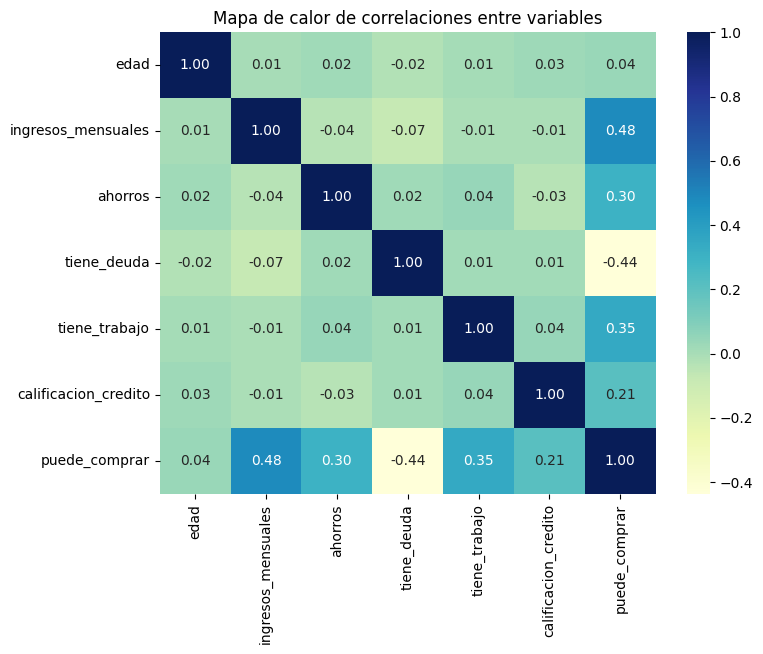

Tamaño entrenamiento: (420, 6)
Tamaño prueba: (180, 6)


In [25]:
# Seleccionar variables independientes (X) y objetivo (y)
X = data[["edad", "ingresos_mensuales", "ahorros", "tiene_deuda", "tiene_trabajo", "calificacion_credito"]]
y = data["puede_comprar"]

# Visualizar correlaciones entre variables numéricas
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Mapa de calor de correlaciones entre variables")
plt.show()


# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

print("Tamaño entrenamiento:", X_train.shape)
print("Tamaño prueba:", X_test.shape)


### 1.4.2 Model Selection

Se elige un **clasificador lineal (Perceptrón)** porque:

- Los datos son tabulares y se espera una frontera de decisión lineal o casi lineal.
- Es un modelo **simple, rápido y eficiente**.
- Permite entender los principios básicos de los clasificadores lineales.

#### 1.4.3 Model Training

Se crea un modelo de Perceptron con un máximo de 1000 iteraciones y una tasa de aprendizaje de 0.1, y luego se entrena usando los datos de entrenamiento X_train y y_train para que aprenda a separar las clases.


In [26]:
# Crear y entrenar el modelo Perceptron
model = Perceptron(max_iter=1000, eta0=0.1, random_state=42)
model.fit(X_train, y_train)

print("Modelo entrenado correctamente.")

Modelo entrenado correctamente.


#### 1.4.4 Prediction

La función test_predictions toma un modelo entrenado y un conjunto de datos, realiza predicciones sobre las entradas X y luego imprime las primeras predicciones comparándolas con las etiquetas reales y para evaluar rápidamente el desempeño del modelo.


In [27]:
# Realizar predicciones
y_pred = model.predict(X_test)

# Mostrar algunas predicciones
comparison = pd.DataFrame({"Real": y_test.values[:10], "Predicción": y_pred[:10]})
comparison

,Real,Predicción
0,0,0
1,0,0
2,1,1
3,1,1
4,0,0
5,0,0
6,0,0
7,1,1
8,0,0
9,0,0


#### 1.4.5 Model Evaluation

Se calcula la exactitud (accuracy) del modelo comparando las predicciones sobre el conjunto de prueba con las etiquetas reales. Luego, se visualiza la frontera de decisión del Perceptrón en el espacio de características, mostrando en un gráfico las regiones asignadas a cada clase y superponiendo los puntos de prueba para ver cómo el modelo separa las clases.


Accuracy del modelo: 0.97


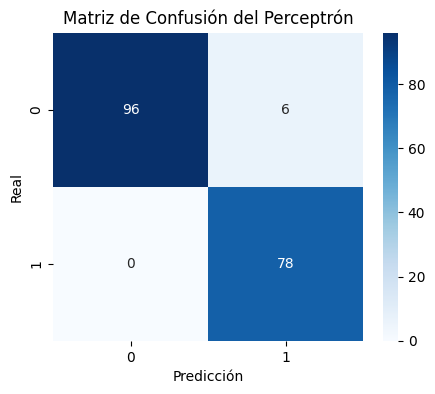


Reporte de Clasificación:

              precision    recall  f1-score   support

           0       1.00      0.94      0.97       102
           1       0.93      1.00      0.96        78

    accuracy                           0.97       180
   macro avg       0.96      0.97      0.97       180
weighted avg       0.97      0.97      0.97       180



In [28]:
# Calcular Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy del modelo: {acc:.2f}")

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión del Perceptrón")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

# Reporte detallado
print("\nReporte de Clasificación:\n")
print(classification_report(y_test, y_pred))







Interpretación:
Un valor de Accuracy alto (por ejemplo > 0.9) indica que el Perceptrón logró separar correctamente la mayoría de los puntos de prueba.




### 1.5 Referencias bibliográficas

Rosenblatt, F. (1958). The Perceptron: A Probabilistic Model for Information Storage and Organization in the Brain. Psychological Review.

Scikit-learn Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html

Daniel. (2023b, octubre 30). Perceptrón: ¿qué es y para qué sirve? DataScientest. https://datascientest.com/es/perceptron-que-es-y-para-que-sirve

Joaquín Amat Rodrigo j.amatrodrigo@gmail.com. (s. f.-b). Algoritmo perceptrón. https://cienciadedatos.net/documentos/50_algoritmo_perceptron